<h4>
<ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">OBJECTIVE:</span></strong></li>
</ul>
<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Use the text data to build simple feed-forward Neural Nets and benchmark against the base ML models.</span></p>
    </h4>

In [1]:
# imports

import os
import math
import random
import warnings
from time import time
from pathlib import Path
import pandas as pd, numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from collections import defaultdict, Counter
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud, STOPWORDS
import tensorflow

tqdm.pandas()
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

C:\Users\surya\anaconda3\envs\full\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
# reproducibility
seed = 7
random.seed(seed)
tensorflow.random.set_seed(seed)

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Import & Analyse the data.</span></strong></li>
</ul></h3>

In [3]:
dataset = pd.read_excel('./data/preprocessed_data.xlsx')
dataset.sample(10)

,short_description,description,caller,group,char_length,word_length,short_char_length,short_word_length,description_keywords,short_description_keywords,group_code,char_length_bins,cleaned_description,cleaned_short_description,cleaned_char_length,cleaned_word_length,cleaned_short_char_length,cleaned_short_word_length
1867,set abc code erp 81807016 under me in crm.,set abc code erp 81807016 under me in crm. in ...,srhoeyza rkhuldgq,GRP_40,56,13,43,9,set abc code erp,set abc code erp,35,7,set abc code erp 81807016 crm erp ok,set abc code erp 81807016 crm,36,8,29,6
3587,vip 1: please add me to the allowed sender lis...,please add me to the allowed sender list for t...,hkrecpfv kgwpbexv,GRP_26,66,13,73,15,usx team members,usx team members,19,8,add allow sender list usx team member,vip 1 add allow sender list usx team member,37,7,43,9
6957,business_client SID_1 search_server not working,"hi, i can find documents in engineering tool S...",aqourvgz mkehgcdu,GRP_14,238,39,47,5,documents in engineering tool SID,client SID,6,25,find document engineer tool sid 1 business cli...,business client sid 1 search server work,154,24,40,7
4623,no response from other side.,no response from other side.,efbwiadp dicafxhv,GRP_0,28,5,28,5,response from other side,response from other side,0,2,response side,response side,13,2,13,2
5862,wireless outage again-taiwan 0830,\n\nreceived from: ticqvhal.vgokzesi@gmail.com...,ticqvhal vgokzesi,GRP_4,110,10,33,4,outage of taiwan,wireless outage again-taiwan,34,14,wireless companysecure outage taiwan help,wireless outage taiwan 0830,41,5,27,4
3595,computer crashed after a reboot,computer crashed after a reboot,zstkagwu jlyrhdcf,GRP_0,31,5,31,5,computer crashed after a reboot,computer crashed after a reboot,0,3,computer crash reboot,computer crash reboot,21,3,21,3
2439,summary:when i run wip list and try to do my r...,summary:when i run wip list and try to do my r...,gdpxqyhj iapghvke,GRP_0,111,22,111,22,table field name not valid,table field name not valid,0,13,summary run wip list try report get run time e...,summary run wip list try report get run time e...,84,16,84,16
3892,user unable tologin to vpn.,name:lizhwdoe mjudivse\nlanguage:\nbrowser:mic...,lizhwdoe mjudivse,GRP_0,160,15,28,5,microsoft internet explorer email,user unable tologin to vpn,0,17,ca t login vpn,user unable tologin vpn,14,4,23,4
676,account unlock,account unlock,eboutzmn umzvbkfh,GRP_0,14,2,14,2,account unlock,account unlock,0,0,account unlock,account unlock,14,2,14,2
2096,need access to folder,\n\nreceived from: umdyvbxo.qwzstijr@gmail.com...,umdyvbxo qwzstijr,GRP_12,113,15,22,4,drive of usa,access to folder,4,14,need access quality folder lan d2 drive usa,need access folder,43,8,18,3


In [4]:
dataset.isna().sum()

short_description              0
description                    0
caller                         0
group                          0
char_length                    0
word_length                    0
short_char_length              0
short_word_length              0
description_keywords           7
short_description_keywords    38
group_code                     0
char_length_bins               0
cleaned_description            0
cleaned_short_description      0
cleaned_char_length            0
cleaned_word_length            0
cleaned_short_char_length      0
cleaned_short_word_length      0
dtype: int64

In [5]:
dataset[dataset.isna().any(axis=1)].to_csv('./data/missing_keywords.csv')
dataset[dataset.isna().any(axis=1)]  # check rows with missing values

,short_description,description,caller,group,char_length,word_length,short_char_length,short_word_length,description_keywords,short_description_keywords,group_code,char_length_bins,cleaned_description,cleaned_short_description,cleaned_char_length,cleaned_word_length,cleaned_short_char_length,cleaned_short_word_length
483,: k-bngell-cgdaytshqsd <k-bngell-cgdaytshqsd@c...,\n\nreceived from: lvxakohq.tsfnhowj@gmail.com...,lvxakohq tsfnhowj,GRP_19,210,33,69,3,rao left company. with kind,NaN,11,22,pl add name ts team also need administrative c...,k bngell cgdaytshqsd,107,19,20,3
708,id 04637,id 04637 printer have paper stuck up issue.,ongumpdz pjkrfmbc,GRP_19,43,8,8,2,printer have paper stuck,NaN,11,5,04637 printer paper stick issue,04637,31,5,5,1
755,pc name,\n\nreceived from: koahsriq.wdugqatr@gmail.com...,koahsriq wdugqatr,GRP_28,323,37,7,2,service tag,NaN,21,33,need new pc name service tag pc fy80nkssc2 u04...,pc name,220,36,7,2
1114,id : 1064870825,id : 2175981936\n\nperson on other side discon...,efbwiadp dicafxhv,GRP_0,51,8,15,3,person on other side disconnected,NaN,0,6,2175981936 person side disconnect,1064870825,33,4,10,1
1294,"dn 9169508476,t/o 642392",\n\nreceived from: gjtyswkb.dpvaymxr@gmail.com...,gjtyswkb dpvaymxr,GRP_6,129,19,24,3,received,NaN,56,15,dear chk dn 9169508476 help check urgent,dn 9169508476 642392,40,7,20,3
1331,"apac, company: multiple switches went down at ...",company-ap-chn-apac-company-fpsf-2960s-access-...,mnlazfsr mtqrkhnx,GRP_8,150,3,68,12,NaN,apac,72,17,company ap chn apac company fpsf 2960s access ...,apac company multiple switch go 07 36 pm et,150,27,43,9
1641,need help,\n\nreceived from: axcbfuqo.yiagubvh@gmail.com...,axcbfuqo yiagubvh,GRP_0,376,65,9,2,good morning,NaN,0,35,trouble password change password possibility c...,need help,188,26,9,2
1823,bgflmyar.xgufkidq@gmail.com wanted to check if...,bgflmyar.xgufkidq@gmail.com wanted to check if...,olckhmvx pcqobjnd,GRP_0,83,13,83,13,tool on his phone,NaN,0,10,want check login hr tool phone,want check login hr tool phone,30,6,30,6
2396,need your help!!,\n\nreceived from: ezwcpqrh.bnwqaglk@gmail.com...,ezwcpqrh bnwqaglk,GRP_0,571,93,17,3,emal thru the web mail,NaN,0,44,desk send ts emal thru web mail open ms office...,need help,304,49,9,2
2436,changes in ad,"hi, there,\nmy reporting line in the outlook o...",ywbnzxud qzwrynux,GRP_2,246,44,13,3,outlook organization system is wrong,NaN,12,25,report line outlook organization system wrong ...,change ad,139,20,9,2


In [6]:
le = LabelEncoder()
dataset['group_code'] = le.fit_transform(dataset.group)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8432 entries, 0 to 8431
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   short_description           8432 non-null   object
 1   description                 8432 non-null   object
 2   caller                      8432 non-null   object
 3   group                       8432 non-null   object
 4   char_length                 8432 non-null   int64 
 5   word_length                 8432 non-null   int64 
 6   short_char_length           8432 non-null   int64 
 7   short_word_length           8432 non-null   int64 
 8   description_keywords        8425 non-null   object
 9   short_description_keywords  8394 non-null   object
 10  group_code                  8432 non-null   int32 
 11  char_length_bins            8432 non-null   int64 
 12  cleaned_description         8432 non-null   object
 13  cleaned_short_description   8432 non-null   obje

In [7]:
le.classes_

array(['GRP_0', 'GRP_1', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_3', 'GRP_30',
       'GRP_31', 'GRP_32', 'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36',
       'GRP_37', 'GRP_38', 'GRP_39', 'GRP_4', 'GRP_40', 'GRP_41',
       'GRP_42', 'GRP_43', 'GRP_44', 'GRP_45', 'GRP_46', 'GRP_47',
       'GRP_48', 'GRP_49', 'GRP_5', 'GRP_50', 'GRP_51', 'GRP_52',
       'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56', 'GRP_57', 'GRP_58',
       'GRP_59', 'GRP_6', 'GRP_60', 'GRP_61', 'GRP_62', 'GRP_63',
       'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67', 'GRP_68', 'GRP_69',
       'GRP_7', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73', 'GRP_8', 'GRP_9'],
      dtype=object)

In [8]:
def merge_descriptions(row):
    merged_descr = np.nan
    if (row.cleaned_short_description == row.cleaned_description or 
        str(row.description).startswith(str(row.cleaned_short_description))):
        merged_descr = str(row.cleaned_description)
    else:
        merged_descr = str(row.cleaned_short_description) + " " + str(row.cleaned_description)
    row['merged_description'] = str(merged_descr)
    return row

dataset = dataset.progress_apply(merge_descriptions, axis=1)

100%|██████████████████████████████████████████████████████████████████████████| 8432/8432 [00:08<00:00, 975.45it/s]


In [9]:
dataset[['cleaned_short_description', 'cleaned_description', 'merged_description']].sample(10)

,cleaned_short_description,cleaned_description,merged_description
2192,kein datenabgleich zwischen eu tool und erp ge...,kein datenabgleich zwischen eu tool und erp ge...,kein datenabgleich zwischen eu tool und erp ge...
3095,business client work,unable access business client open business cl...,business client work unable access business cl...
458,job job 593 fail job scheduler 05 07 00,job job 593 fail job scheduler 05 07 00,job job 593 fail job scheduler 05 07 00
693,hostname 1325 drive flasng yellow message disp...,check hostname 1325 shop floor app server driv...,hostname 1325 drive flasng yellow message disp...
5953,login help hub,login help hub,login help hub
2405,prognose crm forecast plan dashbankrd work res...,dear one user affect get sale rep indicate ca ...,prognose crm forecast plan dashbankrd work res...
4868,job job 2555 fail job scheduler 22 00 00,job job 2555 fail job scheduler 22 00 00,job job 2555 fail job scheduler 22 00 00
745,reinstall hardcopy und eu tool lndypaqg,reinstall hardcopy und eu tool lndypaqg,reinstall hardcopy und eu tool lndypaqg
488,login issue,login issue verify user detail name check user...,login issue verify user detail name check user...
6663,probleme mit vpn client,hallo meine herren ich kann unsere vpn nicht b...,probleme mit vpn client hallo meine herren ich...


In [10]:
X = np.array(dataset.merged_description)
y = np.array(dataset.group_code)
X.shape, y.shape

((8432,), (8432,))

In [11]:
from tensorflow.keras.utils import to_categorical
y_dummy_coded = to_categorical(y)
y[0], y_dummy_coded[0]

(0,
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.], dtype=float32))

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_dummy_coded, test_size=.2, random_state=seed)  # splits are stratified by y

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6745,), (1687,), (6745, 74), (1687, 74))

In [14]:
X_train[0], y_train[0]  # check sample

('additional correction sale org 1278 company address phone number require germany move 1 sale organisation address 1278 phone number fax number need reverse original phone fax number furth 0911 2 plant address plant 124 phone fax number need adjusted show germany central phone number fax 3 company code address 5278 need revert back address furth germany detail attach ticket',
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.], dtype=float32))

In [15]:
# TODO: Check the distributions of groups in training and testing sets, i.e, if they vary too much
# stratify by y if required during splits
# or data augmentation to upsample minority classes to balance the group distributions

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Tokenize and pad sequences</span></strong></li>
</ul></h3>

In [16]:
# define params
NUM_WORDS = 20000
EMBEDDING_DIM = 300
MAX_LEN = 100 # dataset['word_length'].max()
MAX_LEN

100

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words=NUM_WORDS)
tokenizer.fit_on_texts(X_train)
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)
X_train_tokens[0], X_test_tokens[0]

([184,
  2093,
  93,
  606,
  1609,
  10,
  148,
  45,
  116,
  169,
  146,
  375,
  15,
  93,
  6817,
  148,
  1609,
  45,
  116,
  1513,
  116,
  23,
  1729,
  674,
  45,
  1513,
  116,
  804,
  6818,
  30,
  75,
  148,
  75,
  2370,
  45,
  1513,
  116,
  23,
  4267,
  90,
  146,
  3354,
  45,
  116,
  1513,
  73,
  10,
  188,
  148,
  6819,
  23,
  1195,
  174,
  148,
  804,
  146,
  117,
  88,
  17],
 [93, 2095, 280, 1029, 783, 355, 9, 2095, 1029, 1360, 2095, 211, 280])

In [18]:
y_train[0], y_test[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.], dtype=float32))

In [19]:
# pad sequences to cut longer texts to a uniform length and pad the sentences that are shorter than that with <PAD> token

# using just 20 words from each headline will severely limit the information that is 
# available to the model and affect performance although the training will be faster
X_train_padded = pad_sequences(X_train_tokens,
                               padding='post',
                               truncating='post',
                               maxlen=MAX_LEN)
X_test_padded = pad_sequences(X_test_tokens,
                              padding='post',
                              truncating='post',
                              maxlen=MAX_LEN)


print(f'X train:  {X_train_padded.shape}\nX test:   {X_test_padded.shape}')

X train:  (6745, 100)
X test:   (1687, 100)


In [20]:
pprint(X_train_padded[0], compact=True)

array([ 184, 2093,   93,  606, 1609,   10,  148,   45,  116,  169,  146,
        375,   15,   93, 6817,  148, 1609,   45,  116, 1513,  116,   23,
       1729,  674,   45, 1513,  116,  804, 6818,   30,   75,  148,   75,
       2370,   45, 1513,  116,   23, 4267,   90,  146, 3354,   45,  116,
       1513,   73,   10,  188,  148, 6819,   23, 1195,  174,  148,  804,
        146,  117,   88,   17,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])


In [21]:
WORD_TO_INDEX = tokenizer.word_index
# pprint(WORD_TO_INDEX, compact=True)
pprint(list(WORD_TO_INDEX.keys())[:100], compact=True)

['job', 'yes', 'na', 'password', 'erp', 'tool', 'user', 'ts', 'issue',
 'company', 'sid', 'reset', 'access', 'scheduler', '1', '00', 'ticket',
 'unable', 'work', 'error', 'fail', 'account', 'need', 'email', 'site', 'help',
 'system', 'hostname', 'get', '2', 'login', 'circuit', 'power', 'outlook',
 'network', 'use', 'vendor', 'change', '34', 'update', 'name', 'message',
 'backup', 'see', 'phone', 'telecom', 'server', 'try', '10', 'able', 'outage',
 'log', 'check', 'new', 'problem', 'start', 'crm', 'engineering', 'request',
 'connect', 'call', 'usa', 'type', 'time', 'printer', 'order', 'report', 'vpn',
 'team', 'open', 'contact', 'skype', '3', 'lock', 'plant', 'et', 't', 'send',
 'create', '4', '5', 'window', 'file', 'pc', 'since', 'print', 'schedule',
 'attach', 'device', 'show', '8', 'maintenance', 'sale', '11', '12', 'receive',
 'abende', 'notify', '23', 'management']


In [22]:
VOCAB_SIZE = len(WORD_TO_INDEX) + 1
VOCAB_SIZE

13790

In [23]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
def retrieve_description_feat(x, mapping=WORD_TO_INDEX) -> str:
    # increment 3 
    mapping = {k:(v + 3) for k, v in mapping.items()}
    mapping['<PAD>'] = 0
    mapping['<START>'] = 1
    mapping['<UNK>'] = 2
    inv_mapping = {v: k for k, v in mapping.items()}
    return str(" ".join(inv_mapping.get(i, '<NA>') for i in x))

retrieve_description_feat(X_test_padded[7])

'1 22 team response complaint synchronize <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>'

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">GloVe Embeddings</span></strong></li>
</ul></h3>

In [24]:
EMBEDDING_DIM

300

In [25]:
def get_embedding_matrix(embedding_dim=EMBEDDING_DIM):
    embeddings = defaultdict()
    if embedding_dim == 200:
        file_path = f'./data/glove.6B.{embedding_dim}d.txt'
    elif embedding_dim == 300:
        file_path = f'./data/glove.840B.{embedding_dim}d.txt'
    for l in open(file_path, encoding='utf-8'):
        word = l.split(" ")[0]
        embeddings[word] = np.asarray(l.split(" ")[1:], dtype='float32')

    embeddings = dict(embeddings)

    # create a weight matrix for words in training docs
    embedding_matrix = np.zeros((NUM_WORDS, embedding_dim))

    for word, idx in WORD_TO_INDEX.items():
        embedding_vector = embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix

In [26]:
# use pre-trained glove embedding matrix to initialize weights in our model
embedding_matrix = get_embedding_matrix()
embedding_matrix.shape

(20000, 300)

<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Simple Feed-Forward Neural Net</span></strong></li>
</ul></h4>

In [27]:
# !pip install livelossplot
from tensorflow.python.keras.models import Sequential
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import max_norm, unit_norm
from tensorflow.python.keras.callbacks import LambdaCallback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Flatten, Dense, Activation, BatchNormalization, Dropout, Embedding, LSTM, MaxPooling1D, Conv1D, Bidirectional

In [28]:
NUM_CLASSES = len(le.classes_)
VOCAB_SIZE, MAX_LEN, EMBEDDING_DIM, NUM_CLASSES

(13790, 100, 300, 74)

In [29]:
# define model

model1 = Sequential([ 
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    Flatten(),
    Dense(1024, activation = 'relu'),
    Dense(1024, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(NUM_CLASSES, activation = 'softmax')
])

model1.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [30]:
# Define Callbacks and a few helper functions

# simplify the training log
simple_log = LambdaCallback(
    on_epoch_end = lambda e, l: print(f" ~| Epoch: {e+1} | Validation Loss: {l['val_loss']:.5f}", end =" >|> \n" ))

# early stopping
early_stop = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=7,
                              verbose=0, 
                              restore_best_weights=True)

# learning rate reduction
lr_reduce_on_plateau = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=4, 
                                            verbose=1, 
                                            factor=0.4,
                                            min_lr=0.00001)

def plot_learning_curve(hist):
    sns.set()
    plt.figure(figsize=(5,5))
    train = hist.history['loss']
    val = hist.history['val_loss']
    epochs_run = range(1,len(train) + 1)
    sns.lineplot(epochs_run, train, marker = 'o', color = 'coral', label = 'Training Loss')
    sns.lineplot(epochs_run, val,  marker = '>', color = 'green', label = 'Validation Loss')
    plt.title("Loss vs. Epochs", fontsize = 20)
    plt.legend()
    plt.show()

In [31]:
X_train[0]

'additional correction sale org 1278 company address phone number require germany move 1 sale organisation address 1278 phone number fax number need reverse original phone fax number furth 0911 2 plant address plant 124 phone fax number need adjusted show germany central phone number fax 3 company code address 5278 need revert back address furth germany detail attach ticket'

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6745,), (6745, 74), (1687,), (1687, 74))

In [33]:
EPOCHS = 200
try:
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h1 = model1.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
except Exception as e:
    print(e)
    print("\nTraining on CPU:")
    h1 = model1.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 1.85944 >|> 
 ~| Epoch: 2 | Validation Loss: 1.74150 >|> 
 ~| Epoch: 3 | Validation Loss: 1.72742 >|> 
 ~| Epoch: 4 | Validation Loss: 2.12246 >|> 
 ~| Epoch: 5 | Validation Loss: 2.14895 >|> 
 ~| Epoch: 6 | Validation Loss: 2.37142 >|> 
 ~| Epoch: 7 | Validation Loss: 2.50962 >|> 

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
 ~| Epoch: 8 | Validation Loss: 2.61027 >|> 
 ~| Epoch: 9 | Validation Loss: 2.71168 >|> 
 ~| Epoch: 10 | Validation Loss: 2.77748 >|> 

Training Done.


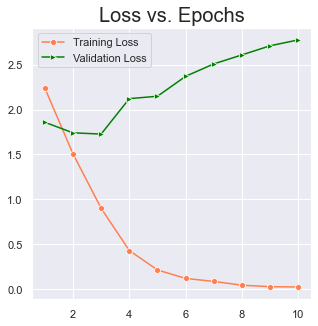

In [34]:
plot_learning_curve(h1)

In [35]:
loss, acc = model1.evaluate(X_test_padded, y_test)
print("Testing Loss: ", loss*100)
print("Testing Accuracy: ", acc*100)

53/53 [==============================] - 0s 8ms/step - loss: 1.8063 - accuracy: 0.6040
Testing Loss:  180.633807182312
Testing Accuracy:  60.40308475494385


<h4><ul>
<span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">
    <li>This model is clearly overfitting, we will add regularization to the next iteration
 </span></ul></h4>

In [36]:
# define model

model2 = Sequential([ 
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    Flatten(),
    Dense(256, activation = 'relu'),
    BatchNormalization(),
    Dense(256, activation = 'relu'),
    BatchNormalization(),
    Dense(NUM_CLASSES, activation = 'softmax')
])

model2.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [37]:
EPOCHS = 200
try:
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h2 = model2.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
except Exception as e:
    print(e)
    print("Training on CPU:")
    h2 = model2.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 2.59394 >|> 
 ~| Epoch: 2 | Validation Loss: 1.94380 >|> 
 ~| Epoch: 3 | Validation Loss: 1.84034 >|> 
 ~| Epoch: 4 | Validation Loss: 1.80988 >|> 
 ~| Epoch: 5 | Validation Loss: 1.82323 >|> 
 ~| Epoch: 6 | Validation Loss: 1.83685 >|> 
 ~| Epoch: 7 | Validation Loss: 1.91414 >|> 
 ~| Epoch: 8 | Validation Loss: 2.04519 >|> 

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
 ~| Epoch: 9 | Validation Loss: 1.89107 >|> 
 ~| Epoch: 10 | Validation Loss: 1.95908 >|> 
 ~| Epoch: 11 | Validation Loss: 1.95138 >|> 

Training Done.


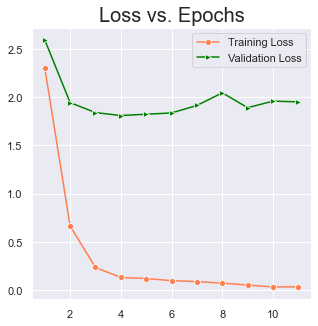

In [38]:
plot_learning_curve(h2)

In [39]:
loss, acc = model2.evaluate(X_test_padded, y_test)
print("Testing Loss: ", loss*100)
print("Testing Accuracy: ", acc*100)

53/53 [==============================] - 0s 5ms/step - loss: 1.8225 - accuracy: 0.6343
Testing Loss:  182.25327730178833
Testing Accuracy:  63.42620253562927


<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Add Dropout Layer</span></strong></li>
</ul></h4>

In [40]:
# define model

model3 = Sequential([ 
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    Flatten(),
    Dense(20, activation = 'relu'),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation = 'softmax')
])

model3.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [41]:
EPOCHS = 200
try:
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h3 = model3.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
except Exception as e:
    print(e)
    print("Training on CPU:")
    h3 = model3.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 2.05753 >|> 
 ~| Epoch: 2 | Validation Loss: 1.84023 >|> 
 ~| Epoch: 3 | Validation Loss: 1.74239 >|> 
 ~| Epoch: 4 | Validation Loss: 1.70713 >|> 
 ~| Epoch: 5 | Validation Loss: 1.64135 >|> 
 ~| Epoch: 6 | Validation Loss: 1.68905 >|> 
 ~| Epoch: 7 | Validation Loss: 1.67758 >|> 
 ~| Epoch: 8 | Validation Loss: 1.76820 >|> 
 ~| Epoch: 9 | Validation Loss: 1.92260 >|> 

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
 ~| Epoch: 10 | Validation Loss: 1.89466 >|> 
 ~| Epoch: 11 | Validation Loss: 1.96651 >|> 
 ~| Epoch: 12 | Validation Loss: 1.99445 >|> 

Training Done.


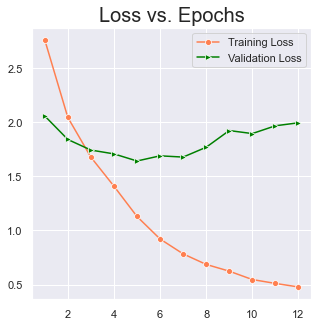

In [42]:
plot_learning_curve(h3)

In [43]:
loss, acc = model3.evaluate(X_test_padded, y_test)
print("Testing Accuracy: ", acc*100)

53/53 [==============================] - 0s 7ms/step - loss: 1.6926 - accuracy: 0.6473
Testing Accuracy:  64.73029255867004


<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Use pre-trained embeddings</span></strong></li>
</ul></h4>

In [44]:
# define model

model3 = Sequential([ 
    Embedding(input_dim=NUM_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_LEN, weights=[embedding_matrix], trainable=True),
    Flatten(),
    Dense(30, activation = 'relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation = 'softmax')
])

model3.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

In [45]:
EPOCHS = 200
try:
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h3 = model3.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
except Exception as e:
    print(e)
    print("Training on CPU:")
    h3 = model3.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 1.84620 >|> 
 ~| Epoch: 2 | Validation Loss: 1.72238 >|> 
 ~| Epoch: 3 | Validation Loss: 1.64293 >|> 
 ~| Epoch: 4 | Validation Loss: 1.67915 >|> 
 ~| Epoch: 5 | Validation Loss: 1.67839 >|> 
 ~| Epoch: 6 | Validation Loss: 1.78722 >|> 
 ~| Epoch: 7 | Validation Loss: 1.82795 >|> 

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
 ~| Epoch: 8 | Validation Loss: 1.88995 >|> 
 ~| Epoch: 9 | Validation Loss: 1.95935 >|> 
 ~| Epoch: 10 | Validation Loss: 2.01581 >|> 

Training Done.


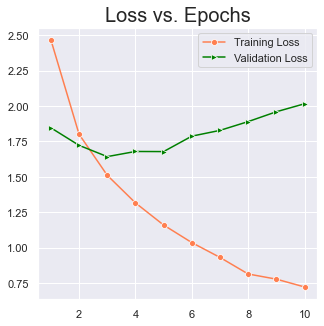

In [46]:
plot_learning_curve(h3)

In [47]:
loss, acc = model3.evaluate(X_test_padded, y_test)
print("Testing Accuracy: ", acc*100)

53/53 [==============================] - 0s 7ms/step - loss: 1.7662 - accuracy: 0.6153
Testing Accuracy:  61.52934432029724


<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">LSTM</span></strong></li>
</ul></h4>

In [48]:
# define model

model4 = Sequential([ 
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    LSTM(32),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation = 'softmax')
])

model4.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [49]:
EPOCHS = 50
try:
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h4 = model4.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
except Exception as e:
    print(e)
    print("Training on CPU:")
    h4 = model4.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 2.50286 >|> 
 ~| Epoch: 2 | Validation Loss: 2.47478 >|> 
 ~| Epoch: 3 | Validation Loss: 2.46620 >|> 
 ~| Epoch: 4 | Validation Loss: 2.46253 >|> 
 ~| Epoch: 5 | Validation Loss: 2.45951 >|> 
 ~| Epoch: 6 | Validation Loss: 2.46105 >|> 
 ~| Epoch: 7 | Validation Loss: 2.45835 >|> 
 ~| Epoch: 8 | Validation Loss: 2.38237 >|> 
 ~| Epoch: 9 | Validation Loss: 2.36089 >|> 
 ~| Epoch: 10 | Validation Loss: 2.30717 >|> 
 ~| Epoch: 11 | Validation Loss: 2.26101 >|> 
 ~| Epoch: 12 | Validation Loss: 2.27733 >|> 
 ~| Epoch: 13 | Validation Loss: 2.23432 >|> 
 ~| Epoch: 14 | Validation Loss: 2.23029 >|> 
 ~| Epoch: 15 | Validation Loss: 2.23706 >|> 
 ~| Epoch: 16 | Validation Loss: 2.23212 >|> 
 ~| Epoch: 17 | Validation Loss: 2.24156 >|> 
 ~| Epoch: 18 | Validation Loss: 2.25283 >|> 

Epoch 00018: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
 ~| Epoch: 19 | Validation Loss: 2.22072 >|> 
 ~| Epoch: 20 | Validation Loss: 2.24

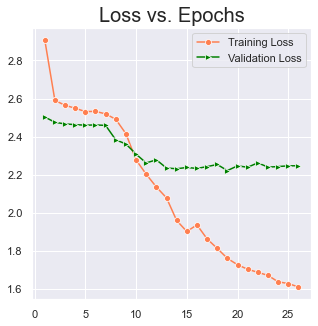

In [50]:
plot_learning_curve(h4)

In [51]:
loss, acc = model4.evaluate(X_test_padded, y_test)
print("Testing Accuracy: ", acc*100)

53/53 [==============================] - 0s 9ms/step - loss: 2.2392 - accuracy: 0.4991
Testing Accuracy:  49.91108477115631


<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Bi-Directional LSTM</span></strong></li>
</ul></h4>

In [52]:
# define model

model4 = Sequential([ 
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    Bidirectional(LSTM(32)),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation = 'softmax')
])

model4.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

In [53]:
EPOCHS = 50
try:
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h4 = model4.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
except Exception as e:
    print(e)
    print("Training on CPU:")
    h4 = model4.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 1.98917 >|> 
 ~| Epoch: 2 | Validation Loss: 1.84032 >|> 
 ~| Epoch: 3 | Validation Loss: 1.71317 >|> 
 ~| Epoch: 4 | Validation Loss: 1.69194 >|> 
 ~| Epoch: 5 | Validation Loss: 1.62231 >|> 
 ~| Epoch: 6 | Validation Loss: 1.60189 >|> 
 ~| Epoch: 7 | Validation Loss: 1.61941 >|> 
 ~| Epoch: 8 | Validation Loss: 1.63725 >|> 
 ~| Epoch: 9 | Validation Loss: 1.66948 >|> 
 ~| Epoch: 10 | Validation Loss: 1.57714 >|> 
 ~| Epoch: 11 | Validation Loss: 1.57898 >|> 
 ~| Epoch: 12 | Validation Loss: 1.66979 >|> 
 ~| Epoch: 13 | Validation Loss: 1.63858 >|> 
 ~| Epoch: 14 | Validation Loss: 1.65452 >|> 

Epoch 00014: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
 ~| Epoch: 15 | Validation Loss: 1.66364 >|> 
 ~| Epoch: 16 | Validation Loss: 1.66259 >|> 
 ~| Epoch: 17 | Validation Loss: 1.68847 >|> 

Training Done.


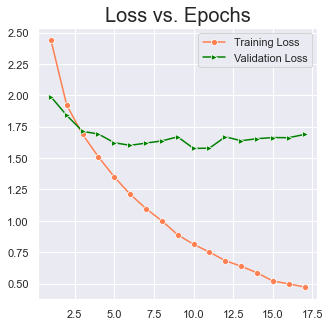

In [54]:
plot_learning_curve(h4)

In [55]:
loss, acc = model4.evaluate(X_test_padded, y_test)
print("Testing Accuracy: ", acc*100)

53/53 [==============================] - 1s 16ms/step - loss: 1.5843 - accuracy: 0.6586
Testing Accuracy:  65.85655212402344


<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">CNN (Dimensionality Reduction) + LSTM</span></strong></li>
</ul></h4>

In [56]:
model5 = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=256, input_length=MAX_LEN),
    Dropout(0.25),
    Conv1D(256, 5, padding = 'same', activation = 'relu', strides = 1),
    Conv1D(256, 5, padding = 'same', activation = 'relu', strides = 1),
    MaxPooling1D(pool_size = 2),
    Conv1D(64, 5, padding = 'same', activation = 'relu', strides = 1),
    MaxPooling1D(pool_size = 2),
    LSTM(75),
    Dense(NUM_CLASSES, activation = 'softmax')
])

model5.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [57]:
EPOCHS = 20
try:
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h5 = model5.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
except Exception as e:
    print(e)
    print("Training on CPU:")
    h5 = model5.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 2.15953 >|> 
 ~| Epoch: 2 | Validation Loss: 2.03527 >|> 
 ~| Epoch: 3 | Validation Loss: 1.97933 >|> 
 ~| Epoch: 4 | Validation Loss: 1.97626 >|> 
 ~| Epoch: 5 | Validation Loss: 1.95289 >|> 
 ~| Epoch: 6 | Validation Loss: 1.97950 >|> 
 ~| Epoch: 7 | Validation Loss: 2.01043 >|> 
 ~| Epoch: 8 | Validation Loss: 2.00164 >|> 
 ~| Epoch: 9 | Validation Loss: 2.03195 >|> 

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
 ~| Epoch: 10 | Validation Loss: 2.04752 >|> 
 ~| Epoch: 11 | Validation Loss: 2.07280 >|> 
 ~| Epoch: 12 | Validation Loss: 2.14650 >|> 

Training Done.


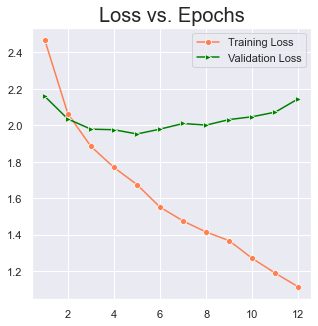

In [58]:
plot_learning_curve(h5)

In [59]:
loss, acc = model5.evaluate(X_test_padded, y_test)
print("Testing Accuracy: ", acc*100)

53/53 [==============================] - 1s 14ms/step - loss: 1.9861 - accuracy: 0.5471
Testing Accuracy:  54.712510108947754


<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">CNN (Dimensionality Reduction) + Bi-Directional LSTM</span></strong></li>
</ul></h4>

In [60]:
model5 = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=256, input_length=MAX_LEN),
    Dropout(0.25),
    Conv1D(256, 5, padding = 'same', activation = 'relu', strides = 1),
    Conv1D(256, 5, padding = 'same', activation = 'relu', strides = 1),
    MaxPooling1D(pool_size = 2),
    Conv1D(64, 5, padding = 'same', activation = 'relu', strides = 1),
    MaxPooling1D(pool_size = 2),
    Bidirectional(LSTM(75, recurrent_dropout=0.5)),
    Dense(NUM_CLASSES, activation = 'softmax')
])

model5.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [61]:
EPOCHS = 20
try:
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h5 = model5.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)
except Exception as e:
    print(e)
    print("Training on CPU:")
    h5 = model5.fit(
            X_train_padded, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop, lr_reduce_on_plateau],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 1.92552 >|> 
 ~| Epoch: 2 | Validation Loss: 1.82282 >|> 
 ~| Epoch: 3 | Validation Loss: 1.76291 >|> 
 ~| Epoch: 4 | Validation Loss: 1.73482 >|> 
 ~| Epoch: 5 | Validation Loss: 1.71375 >|> 
 ~| Epoch: 6 | Validation Loss: 1.75450 >|> 
 ~| Epoch: 7 | Validation Loss: 1.78363 >|> 
 ~| Epoch: 8 | Validation Loss: 1.79060 >|> 
 ~| Epoch: 9 | Validation Loss: 1.88543 >|> 

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
 ~| Epoch: 10 | Validation Loss: 1.88504 >|> 
 ~| Epoch: 11 | Validation Loss: 1.90626 >|> 
 ~| Epoch: 12 | Validation Loss: 1.91783 >|> 

Training Done.


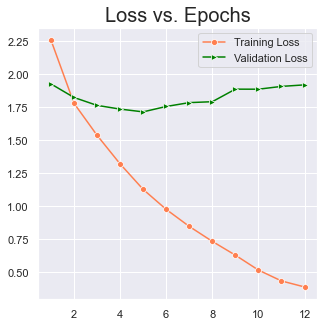

In [62]:
plot_learning_curve(h5)

In [63]:
loss, acc = model5.evaluate(X_test_padded, y_test)
print("Testing Accuracy: ", acc*100)

53/53 [==============================] - 4s 80ms/step - loss: 1.7774 - accuracy: 0.5987
Testing Accuracy:  59.869593381881714


<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Use TfIdf vectors instead of Embedding Layer + Feature Selection</span></strong></li>
</ul></h4>

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# using 75-25 split instead of 50-50 split as we need more data to train neural nets
X_train, X_test, y_train_vec, y_test_vec = train_test_split(X, y, test_size=0.2, random_state=seed)
print(f"Train dataset shape: {X_train.shape}, \nTest dataset shape: {X_test.shape}")

Train dataset shape: (6745,), 
Test dataset shape: (1687,)


In [73]:
NGRAM_RANGE = (1, 2)
TOP_K = 20000
TOKEN_MODE = 'word'
MIN_DOC_FREQ = 2


kwargs = {
    'ngram_range' : NGRAM_RANGE,
    'dtype' : 'int32',
    'strip_accents' : 'unicode',
    'decode_error' : 'replace',
    'analyzer' : TOKEN_MODE,
    'min_df' : MIN_DOC_FREQ
}
vectorizer = TfidfVectorizer(**kwargs)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print(f"Train dataset shape: {X_train_vec.shape}, \nTest dataset shape: {X_test_vec.shape}")

Train dataset shape: (6745, 17085), 
Test dataset shape: (1687, 17085)


In [74]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select best k features, with feature importance measured by f_classif
# Set k as 20000 or (if number of ngrams is less) number of ngrams   
selector = SelectKBest(f_classif, k=min(TOP_K, X_train_vec.shape[1]))
selector.fit(X_train_vec, y_train_vec)
X_train_vec = selector.transform(X_train_vec).astype('float32')
X_test_vec = selector.transform(X_test_vec).astype('float32')
X_train_vec = X_train_vec.toarray()
X_test_vec = X_test_vec.toarray()

print(f"Train dataset shape: {X_train_vec.shape}, \nTest dataset shape: {X_test_vec.shape}")

Train dataset shape: (6745, 17085), 
Test dataset shape: (1687, 17085)


In [79]:
model6 = Sequential([   
    Dense(64, activation='relu', input_shape=X_train_vec.shape[1:]),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(NUM_CLASSES, activation='softmax')
])

model6.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [80]:
EPOCHS = 20
try:
    print("Training on GPU:")
    with tensorflow.device("gpu:0"):  # train on gpu
        h6 = model6.fit(
            X_train_vec, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop],
            verbose = False)
except Exception:
    print("Training on CPU:")
    h6 = model6.fit(
            X_train_vec, y_train,
            validation_split = 0.2,  # do not use the test data for validation to prevent data leakage, we only use to test at the model in the end
            epochs = EPOCHS,
            callbacks = [simple_log, early_stop],
            verbose = False)

print("\nTraining Done.")

Training on GPU:
 ~| Epoch: 1 | Validation Loss: 2.20277 >|> 
 ~| Epoch: 2 | Validation Loss: 1.91673 >|> 
 ~| Epoch: 3 | Validation Loss: 1.77355 >|> 
 ~| Epoch: 4 | Validation Loss: 1.67736 >|> 
 ~| Epoch: 5 | Validation Loss: 1.62489 >|> 
 ~| Epoch: 6 | Validation Loss: 1.59852 >|> 
 ~| Epoch: 7 | Validation Loss: 1.58639 >|> 
 ~| Epoch: 8 | Validation Loss: 1.60385 >|> 
 ~| Epoch: 9 | Validation Loss: 1.61785 >|> 
 ~| Epoch: 10 | Validation Loss: 1.62052 >|> 
 ~| Epoch: 11 | Validation Loss: 1.64508 >|> 
 ~| Epoch: 12 | Validation Loss: 1.70458 >|> 
 ~| Epoch: 13 | Validation Loss: 1.73147 >|> 
 ~| Epoch: 14 | Validation Loss: 1.77386 >|> 

Training Done.


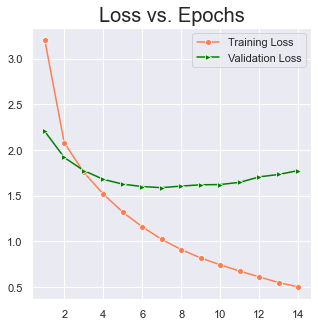

In [81]:
plot_learning_curve(h6)

In [82]:
loss, acc = model6.evaluate(X_test_vec, y_test)
print("Testing Accuracy: ", acc*100)

53/53 [==============================] - 0s 7ms/step - loss: 1.5654 - accuracy: 0.6680
Testing Accuracy:  66.80498123168945


<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Resultant Metrics: </span></strong></li>
</ul></h3>

<table style="width:100%">
  <tr>
    <th>Model</th>
    <th>Test Accuracy</th>
  </tr>
  <tr>
    <td>Simple Feed-Forward Nerual Net</td>
    <td>60.40</td>
  </tr>
<tr>
    <td>Feed-Forward NN + Batch Norm</td>
    <td>63.43</td>
  </tr>
<tr>
    <td>Feed-Forward NN + Dropout</td>
    <td>64.73</td>
  </tr>
<tr>
    <td>Feed-Forward NN + Pre-trained GLoVe embeddings</td>
    <td>61.53</td>
  </tr>
  <tr>
    <td>LSTM</td>
    <td>49.91</td>
  </tr>
    <tr>
    <td>Bi-Directional LSTM</td>
    <td>65.87</td>

<tr>
    <td>Convolution Blocks (Dimensionality Reduction) + LSTM</td>
    <td>54.71</td>
  </tr>
<tr>
    <td>Convolution Blocks (Dimensionality Reduction) + Bi-LSTM</td>
    <td>59.87</td>
  </tr>
<tr>
    <td>TfIdf Vectors + Feature Selection + Feed-forward Neural Net</td>
    <td>66.80</td>
  </tr>
</table>